<a href="https://colab.research.google.com/github/aswinijena3459/Hotel-Booking-analysis-EDA/blob/main/Hotel_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Bookings Analysis

##### **Project Type** - Exploratory Data Analysis
##### **Contribution** - Individual

# **GitHub Link -**

# **Problem Statement-**


#### **Define Your Business Objective?**

# ***Let's Begin !***

#### Importing the dataset from google drive

In [484]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing required libraries

In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
%matplotlib inline 
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = 12,8
# import done to avoid warnings
from warnings import filterwarnings


## ***1. Know Your Data***

In [486]:
## Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone projects/EDA/Hotel Booking Analysis/Hotel Bookings.csv')# Load Dataset
df ###Dataset first look

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [487]:
#### Rows and column count of dataset
df.shape

(119390, 32)

In [488]:
### Dataset complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [489]:
### counting the no.of duplicated rows in the dataset
df.duplicated().sum() 

31994

In [490]:
###Deleting the duplicated rows because they are of no use and also no.of duplicatedrows are very high
df.drop_duplicates(inplace= True)

In [491]:
##checking the shape of dataset after deleting duplicates
df.shape

(87396, 32)

#### Missing values/ Null values

In [492]:
# Missing Values/Null Values Count
null_values=df.isnull().sum().sort_values(ascending=False)
null_values[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

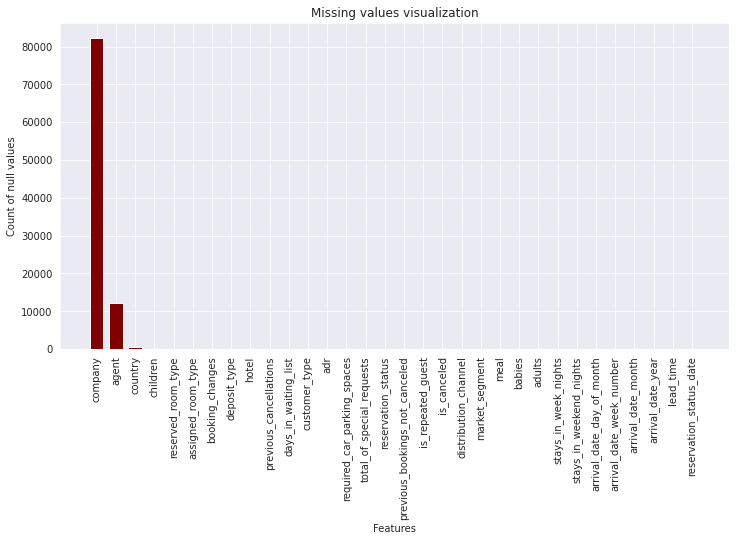

In [493]:
# Visualizing the missing values
features = list(null_values.keys())
missing_values_counts = list(null_values.values)
  
fig = plt.figure(figsize = (12,6 ))
 
# creating the bar plot
plt.bar(features, missing_values_counts, color ='maroon',
        width = 0.7)
plt.xlabel("Features")
plt.ylabel("Count of null values")
plt.title("Missing values visualization")
plt.xticks(features, features, rotation='vertical')
plt.show()

### What did you know about your dataset?

We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## ***2. Understanding Your Variables***

In [494]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [495]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description
First of all we will try to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [496]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [497]:
df['hotel'].unique()
### there are two categories of hotel:- Resort Hotel and city hotel

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [498]:
df['is_canceled'].unique()
### if the booking was cancelled(1) or not(0)

array([0, 1])

In [499]:
df['lead_time'].unique()
### No of days elapsed between the entering date of the booking into the pms and arrival date

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [500]:
df['arrival_date_year'].unique()
### year of arrival date

array([2015, 2016, 2017])

In [501]:
df['arrival_date_month'].unique()
### month of arrival date

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [502]:
df['arrival_date_week_number'].unique()
### week number for arrival date

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [503]:
df['arrival_date_day_of_month'].unique()
###day of arrival date

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [504]:
df['stays_in_weekend_nights'].unique()
###number of weekend nights(saturday,sunday) the guest booked to stay

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [505]:
df['stays_in_week_nights'].unique()
##the no of weeknights (monday to friday) the guest booked to stay

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [506]:
df['adults'].unique()
###the no of adults 

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [507]:
df['children'].unique()
###the no of babies 

array([ 0.,  1.,  2., 10.,  3., nan])

In [508]:
df['meal'].unique()
##kind of meal opted for

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [509]:
df['country'].unique() ####country code

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [510]:
df['market_segment'].unique()
###which segment the customer belongs to

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [511]:
df['distribution_channel'].unique()
#### how the customer accessed the stay

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [512]:
df['is_repeated_guest'].unique()###is the customer coming for the first time(0) or not(1)

array([0, 1])

In [513]:
df['previous_cancellations'].unique()
###no of of cancellations made before

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [514]:
df['previous_bookings_not_canceled'].unique()
###no of non cancelled bookings of the customer

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [515]:
df['reserved_room_type'].unique()
###type of room reserved

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [516]:
df['assigned_room_type'].unique()
###type of room asigned

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [517]:
df['booking_changes'].unique()
###count of changes made to booking

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [518]:
 df['deposit_type'].unique() 
 ###deposit type

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [519]:
df['agent'].unique()###booked through agent
       

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [520]:
df['days_in_waiting_list'].unique()
##no of days in waiting list

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [521]:
df['customer_type'].unique()
##type of customer

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [522]:
df['adr'].unique()
##Average daily rate is the measure of the average paid for rooms sold in a given time period. 

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [523]:
df['required_car_parking_spaces'].unique() ###if car parking space is required

array([0, 1, 2, 8, 3])

In [524]:
df['total_of_special_requests'].unique()
    ###no of special request made

array([0, 1, 3, 2, 4, 5])

In [525]:
df['reservation_status'].unique() 
###status of reservation

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [526]:
df['reservation_status_date'].unique()
###date of specific status

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

## 3. ***Data Wrangling***


### **Cleaning data**
Analyses and algorithms are only as good as the data they’re based on. On average, organizations believe that nearly 30% of their data is inaccurate. This dirty data costs companies 12% of their overall revenue — and they’re losing more than just money. Cleansing produces consistent, structured, accurate data, which allows for informed, intelligent decisions. It also highlights areas for improvement in upstream data entry and storage environments, saving time and money now and in the future.

While cleaning data we will perform following steps: 
1. Remove duplicate rows (which we have already done above)
2. Handling missing values. 
3. Adding important columns/ Creating important columns
4. Checking for outliers and imputation of outliers
5.  Data Preparation (Convert columns to appropriate datatypes. (Categorial to Numerical))

In [527]:
##lets create a copy of the original dataframe so our original dataset remains unchanged
df1=df.copy()
df1.shape ###shape after dropping duplicates

(87396, 32)

#### Step 2 - Handling missing values

In [528]:
df1.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [529]:
df['company'].value_counts() ### checking value counts of different company ids

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

In [530]:
df['agent'].value_counts()   ### checking value_counts of different agent ids

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [531]:
df['country'].value_counts()   ###checking value counts of different country codes

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [532]:
df['children'].value_counts()  ###checking value counts of children column

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

1. **company and agents column** has the big no of null values , we could have deleted it also but after checking the value counts it feels like still can be helpfull. Some particular company and agents are producing good no of customers
So we will fill the null values with 0
2. **Country column** is a categorical feature so we will replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.
3. **Children column** has very less null and contains the count of children.It also has 0 children category. so we will replace all the missing values with the rounded mean value

In [533]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)  ###filling null values with 0
df1['children'].fillna(df1['children'].mean(), inplace = True) ###filling null values with mean value



In [534]:
df['country'].mode()[0] ###checking for best datatype to fill values

'PRT'

In [535]:
df1['country'].fillna(df1['country'].mode()[0],inplace=True)   ### filling null values with mode value

In [536]:
df1.isnull().sum()  ###checking if any null values are still left or not

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now null values are eliminated but we still check for any dirty data or some data which cant be true ,which can make our analysis wrong.
we will use a trial and error method to search for such controversial columns/data .

In [537]:
pd.set_option('display.max_columns', None)  ### to see all the columns of the dataset which will make our analysis easier
df1.head()  ###lets see our data for more refinement/manipulation

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Step 2- Creating important columns

In [538]:
df1['stays_in_week_nights'] + df1['stays_in_weekend_nights'] ###checking for if any zero duration stays

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Length: 87396, dtype: int64

In [539]:
df1[df1['stays_in_weekend_nights']+df1['stays_in_week_nights']==0].shape  ###checking for if any zero duration stays

(651, 32)

In [540]:
df1[df1['stays_in_weekend_nights']+df1['stays_in_week_nights']+df1['adults'] + df1['children'] + df1['babies']==0].shape

(60, 32)

In [541]:
df1[df1['adults'] + df1['children'] + df1['babies']==0].shape   
####there are some rows where total no of adults ,babies, children are zero , which is not possible

(166, 32)

Looks like there is something fishy here. So we will drop the rows where total no of adults, children, babies are zero.
Not doing anything with weeknight and weekend night stay columns because may be the stay was for very short duration in the day

In [542]:
df1.shape ###current shape of dataset

(87396, 32)

In [543]:
df1.drop(df1[df1['adults'] + df1['children'] + df1['babies']==0].index, inplace=True )  
### dropping those rows where total no of adults ,babies, children are zero , which is not possible


In [544]:
### Lets check the datatypes of the columns because inappropriate data types can hinder our coding
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Here everything seems fine except children, company, agent column should int data type

Reservation status date should not be an object datatype, it should be in date time format 

In [545]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [546]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

We need to create some new columns which will carry information of more than one columns like 'total_stay' and 'total_people'

In [547]:
# Adding total staying days in hotels.This column will be our one main weapons of analysis
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [548]:
df1.drop(['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights'],axis=1,inplace=True) ###Dropping old columns

## Step 3 - Checking for outliers in the dataset

In [549]:
### creating a list of suspected continous variables where otliers could be found
features=['lead_time','booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'total_stay','total_people']

- Using boxplot, and summary statistics are best way to visualize outliers . Because it shows clearly how much data is present beyond upper and lower fence in case of box plot.
- And in case of summary statistics we can check the difference between 75th percentile value and max value, 25th percentile value and min value to get an idea about presence of outliers 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

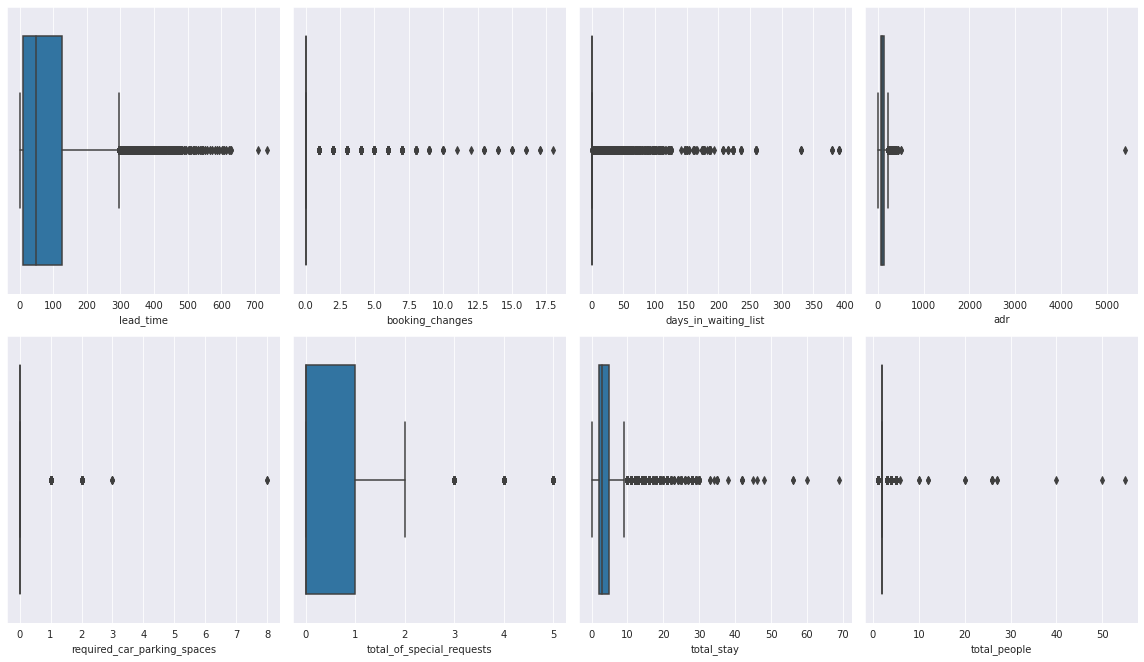

In [550]:
### Checking boxplot for detecting outliers 
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(df1[feature])
    n+=1
    plt.tight_layout()

In [551]:
### checking summary statistics of features
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934,3.628534,2.029107
std,0.446637,86.058683,0.686064,13.669216,8.835545,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051,2.742948,0.790141
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,5.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


- We should also check the distribution of the data of selected features using a distplot so that we can select the method of treatment of outliers.
- If the distribution follows a pattern simmilar to gaussian normal distribution then we will consider the data points outside 3rd standard deviation as outliers .
- If the distribution is skewed then data points outside (+-) 3 * inter quartile range will be cinsideered as outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

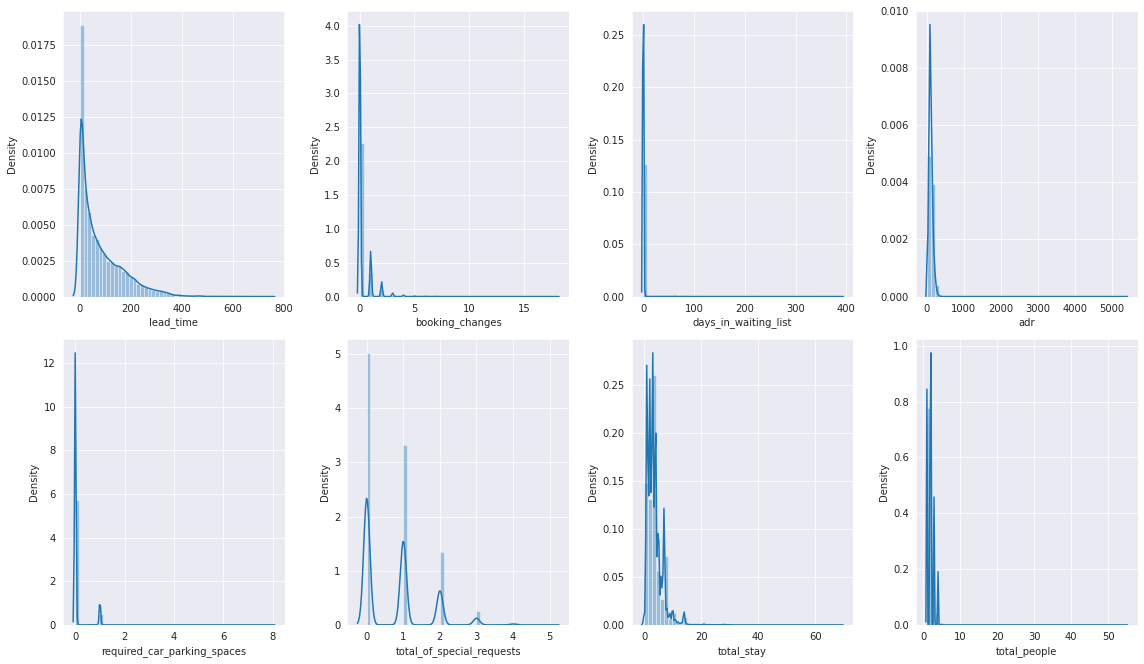

In [552]:
### Checking distplot for understanding the distribution of data 
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.distplot(df1[feature])
    n+=1
    plt.tight_layout()

**2. What is/are the insight(s) found from the chart?**

From distplot and summary statistics we understand that lead_time and adr follow a distribution somewhat simillar to normal distribution.
Every other variables have a skewed distribution of data points 

###Outlier Treatment of lead_time and adr variable.

In [553]:
###Creating a function to get the upper limit and lower limit of lead_time and adr variable
def limits(variable) :
    mean=df1[variable].mean()
    stan_dev=df1[variable].std()
    lower_bound=mean - 3 * stan_dev
    upper_bound=mean + 3 * stan_dev
    return lower_bound, upper_bound
    





In [554]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for adr variable
print('Lower limit of adr variable:',limits('adr')[0])
print('Upper limit of adr variable:',limits('adr')[1])


Lower limit of adr variable: -58.15565006765668
Upper limit of adr variable: 271.1917115144067


In [555]:
###Applying limits  function that i have creatde to get the lower limit and upper limit for lead_time variable
print('Lower limit of lead_time variable:',limits('lead_time')[0])
print('Upper limit of lead_time variable:',limits('lead_time')[1])

Lower limit of lead_time variable: -178.20503036042493
Upper limit of lead_time variable: 338.1470686500042


We will treat every data point of adr variable outside 0 - 262 range as an outlier and every data point of lead_time variable outside 0 - 338 range as an outlier.

In [556]:
df1.loc[df1['lead_time'] > 338,'lead_time'] = 338  ###replacing outliers greater than 338 with 338
df1.loc[df1['adr'] > 262,'adr'] = 262       ##replacing outliers greater than 338 with 271  
df1.loc[df1['adr'] < 0,'adr'] = 0       ##replacing outliers less than 0 with 0  


Figuring out outliers for Total_people column is a little bit tricky because we have created this column by adding babies , adults, children column.
So we will use limits function first see the extreme points of distribution

In [557]:
print('Lower limit of total_people variable:',limits('total_people')[0])
print('Upper limit of total_people variable:',limits('total_people')[1])

Lower limit of total_people variable: -0.3413169972583736
Upper limit of total_people variable: 4.399530914488684


In [558]:
df1['total_people'].value_counts()  ###Checking the value counts for every unique values

2     57057
1     16072
3     10078
4      3870
5       136
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: total_people, dtype: int64

In [559]:
df1.loc[df1['total_people'] > 5 ,'total_people'].shape   ###checking for observations more than 5 for total_people

(17,)

There are very less observations in total_people column above 5 numbers.So after checking distplot,summary statistics, histogram for total_people column We will take numbers outside 0-5 range as outliers in total_people column 

In [560]:
df1.loc[df1['total_people'] > 5,'total_people'] = 5    ###replacing outliers greater than 5 with 5

In [561]:
def inter_quartile(variable) :          ####this function is for variables with a skewed distribution
    q1=df1[variable].quantile(0.25)     ####Multiplying IQR with 3 instead of 1.5 to take most extreme points as outliers
    q2=df1[variable].quantile(0.75)
    IQR= q2-q1
    lower_bound=q1 - 3 * IQR
    upper_bound= q2 + 3 * IQR
    return lower_bound, upper_bound

In [562]:
print('Lower limit of total_stay variable:',inter_quartile('total_stay')[0])
print('Upper limit of total_stay variable:',inter_quartile('total_stay')[1])

Lower limit of total_stay variable: -7.0
Upper limit of total_stay variable: 14.0


In [563]:
df1['total_stay'].value_counts()

3     17827
1     17169
2     15734
4     13565
7      7520
5      6729
6      3263
10     1072
8      1062
14      859
9       779
0       591
11      367
12      196
13      133
15       69
21       55
28       34
16       33
18       24
19       22
17       20
20       14
25       14
29       13
30       13
22       12
24        6
26        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
45        1
38        1
46        1
48        1
34        1
Name: total_stay, dtype: int64

We will take data points greater than 14 and lesser than 1 as ouliers and replace with 14 and 1

In [564]:
df1.loc[df1['total_stay'] >14,'total_stay'] = 14 
df1.loc[df1['total_stay'] <1,'total_stay'] = 1 


Still there are some features where outliers are present .We will do the outlier treatment of those features by analysing distplot, boxplot and summary statistics individually for every feature

In [565]:
####Outlier Treatment
df1.loc[df1['days_in_waiting_list']   >   0,'days_in_waiting_list'  ]=  1
df1.loc[df1['previous_cancellations']   >   1,'previous_cancellations'  ]=  1
df1.loc[df1['previous_bookings_not_canceled']   >   1,'previous_bookings_not_canceled'  ]=  1
df1.loc[df1['booking_changes']   >   1,'booking_changes'  ]=  1
df1.loc[df1['days_in_waiting_list']   >   1,'days_in_waiting_list'  ]=  1
df1.loc[df1['required_car_parking_spaces']   >   1,'required_car_parking_spaces'  ]=  1
df1.loc[df1['required_car_parking_spaces']   >   2,'required_car_parking_spaces'  ]=  2
df1.loc[df1['required_car_parking_spaces']   >   2,'required_car_parking_spaces'  ]=  2





###Now no outliers are present in the data


## Step 4 - Data preparation

We should make some neccessary changes in the dataset which will make our analysis effective, efficient and ready for EDA 

In [566]:
df1.dtypes ###checking for data types of variables 

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                      int64
company                                    int64
days_in_waiting_list

Some Other variables are also present in the dataset which are int64 data types but behaves as categorical features , so it is better if we change its data type to string

In [567]:
df1['is_canceled']=df1['is_canceled'].astype('str')    #### changing datatypes from int64 to string
df1['is_repeated_guest']=df1['is_repeated_guest'].astype('str')
df1['arrival_date_day_of_month']=df1['arrival_date_day_of_month'].astype('str')
df1['arrival_date_year']=df1['arrival_date_year'].astype('str')
df1['arrival_date_week_number']=df1['arrival_date_week_number'].astype('str')
df1['agent']=df1['agent'].astype('str')
df1['company']=df1['company'].astype('str')

In [568]:
df1['is_repeated_guest'].value_counts()   ####checking for categories of feature

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

In [569]:
df1['is_canceled'].value_counts()         ####checking for categories of feature

0    63221
1    24009
Name: is_canceled, dtype: int64

In **'is_canceled'** column we can change the data type of the column to string and rename two categories into cancelled and not_cancelled

In **'is_repeated_guest'** column we can change the data type to string and rename two categories into repeated and not_repeated   

In [570]:
df1['is_canceled']=np.where(df1['is_canceled']== '0' ,'not_cancelled','cancelled')      ###changing the categories to cancelled and not cancelled
df1['is_repeated_guest']=np.where(df1['is_repeated_guest']== '0' ,'not_repeated','repeated')    ###changing the categories to repeated or not repeated

In [571]:
df1.dtypes ### checking for datatypes of variables after making changes


hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                         object
arrival_date_month                        object
arrival_date_week_number                  object
arrival_date_day_of_month                 object
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                     object
company                                   object
days_in_waiting_list

#**EDA**

#**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

First of all we need to distinguish between categorical and numerical features to start EDA part.



In [572]:
df1['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [573]:
df1['customer_type'].value_counts()

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

In [574]:
df1['country'].value_counts()

PRT    27802
GBR    10424
FRA     8823
ESP     7244
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [575]:
numerical_features=['previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
                       'adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']
                       
categorical_columns=['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number',
 'arrival_date_day_of_month','meal','country','market_segment','distribution_channel','is_repeated_guest',
 'reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']                      


##So lets begin the fun exploration part now. we will go though every one by one 

#**Bivariate and Multivariate analysis**

***Hotel Variable***

#### Chart - 1

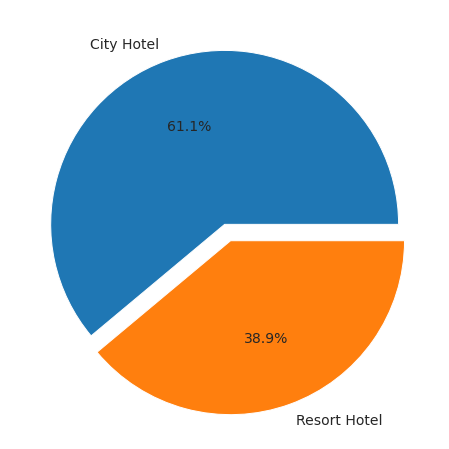

In [576]:
labels=df1['hotel'].value_counts().index
sizes=df1['hotel'].value_counts().to_list()
explode=(0,0.1)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

**1. Why did you pick the specific chart?**
- Shows clear difference between two types of hotel by mentioning the data in percentage value. 
- Pie charts and bar charts are best for categorical vs numerical analysis|

**2. What is/are the insight(s) found from the chart?**
- No of city hotels 38.9% is greater than resort hotels 61.1% .
- People are prefering city hotels because they are much cheaper than resort hotels


**3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**
- Yes this insights helps creating positive impact. People can choose between opening a resort hotel or city hotel depending upon their capital at hand and location of property 

Chart - 2

#**Which type of hotel suffers more cancellations ?**

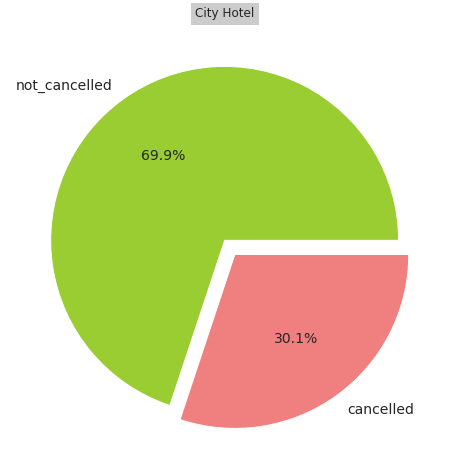

In [577]:
labels=df1[df1['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True).index    ###creating labels for pie chart
sizes=df1[df1['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True).to_list()  ### size of each labels
explode=(0,0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14},colors=colors)  ###code for pie chart
plt.title("City Hotel", bbox={'facecolor':'0.8', 'pad':5})  ###setting title of pie chart
plt.show()

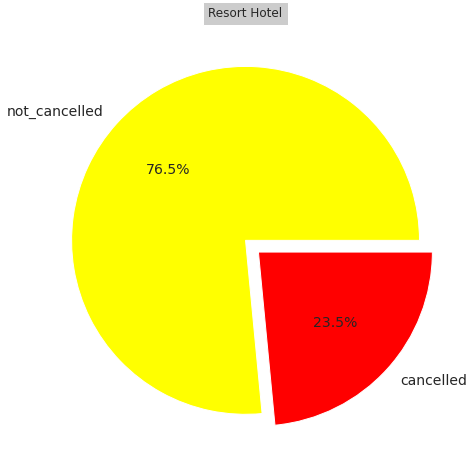

In [578]:
labels=df1[df1['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True).index    ###creating labels for pie chart
sizes=df1[df1['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True).to_list() ### size of each labels
explode=(0,0.1)
colors = ['yellow', 'red']
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', textprops={'fontsize': 14},colors=colors) ###code for pie chart
plt.title("Resort Hotel", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

**2.What is/are the insight(s) found from the chart?**

**We can clearly see here city hotels are getting more cancellations (30.1%) than Resort Hotels (23.5%)** .
- The reason can be that resort hotels may be charging more cancellation fees
- People making more casual bookings with city hotels which doesnt bother if getting cancelled. People book resort hotels for weekend or long vacations

Chart - 3

#**which type of hotel has higher mean lead_time ?**

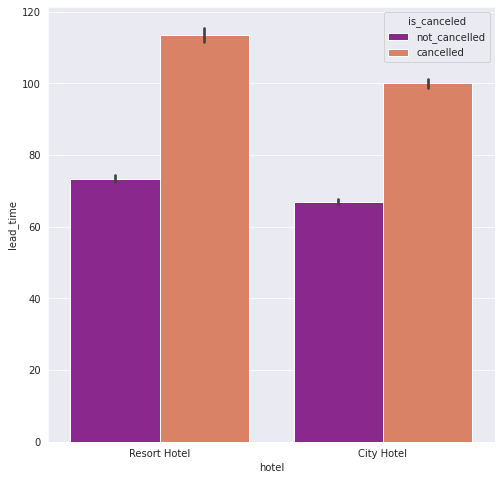

In [579]:
sns.barplot(x ='hotel', y ='lead_time',hue='is_canceled',data = df1, palette ='plasma')  ####getting relationship between hotel, lead_time wrt is_canceled
plt.show()

**2.What is/are the insight(s) found from the chart?**
- From above bar chart we can see that resort hotels get more advance bookings but also has more no of cancellations 
- May be more lead time with resort hotels sometimes lead to cancellations

#**Which hotel has more average daily rate wrt total_stay ?**

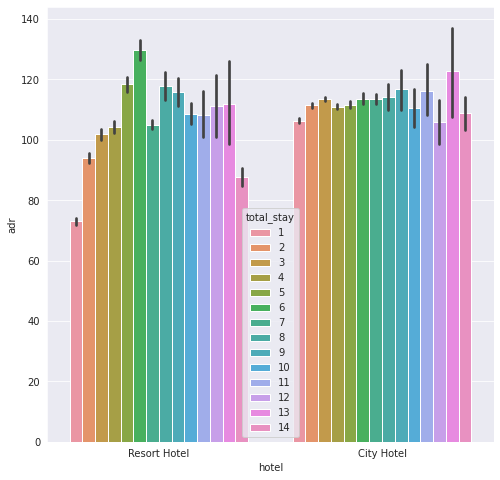

In [581]:
sns.barplot(x ='hotel', y ='adr', data = df1,hue='total_stay')
plt.show()

**2.What is/are the insight(s) found from the chart?**
- Ofcourse city hotel is having more adr due to more occupancy.
- one thing to be noted that city hotel has mean adr between 100-120 irrespective of the duration of stay unlike resort hotel where adr varies more depending upon stay duration.

#**Which type of room in both hotels leads to more average daily rate ?**

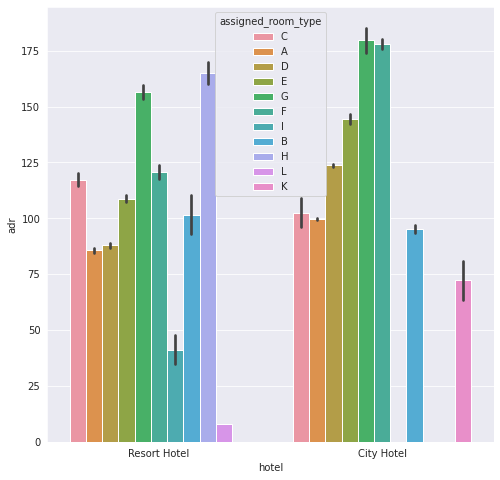

In [592]:
sns.barplot(x ='hotel', y ='adr', data = df1, hue='assigned_room_type',dodge = True)
plt.show()

**2.What is/are the insight(s) found from the chart?**
- G, H, F type rooms generate more revenue in case of resort hotels
-  Mainly D, E, G, F type rooms generate revenue more in case of city hotels

#**Which is the preferred hotel for different market segments ?**

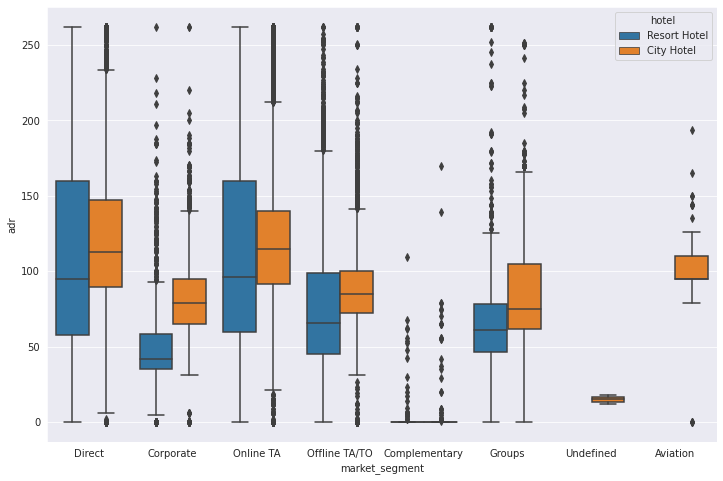

In [609]:
sns.boxplot(x ='market_segment', y ='adr', data = df1, hue ='hotel') ###plotting a boxplot to understand relationship between adr and 
plt.show()                                                            ### and market segments wrt to hotels

**2.What is/are the insight(s) found from the chart?**
- Resort hotels are getting more volume of guests from direct and Online travel agents market segments where the adr is spread between 55 and 155 for most deals
- City hotels are also getting more volume of guests from direct and Online travel agents market segments but there is a clear difference between adr range which is between 80 and 150
- Corporate market segment prefers stay and pay more money  at city hotels little bit more over resort hotels. 
- There is clear and huge difference in terms of adr between Online travel agents and Offline travels agents/operators due to involvement of 3rd party website companies. So people will get cheaper deals with hotels using offline methods
- In case of aviation market segment they book only city hotels may be for flight crew and staffs between flights

#**Lead_time variable** 

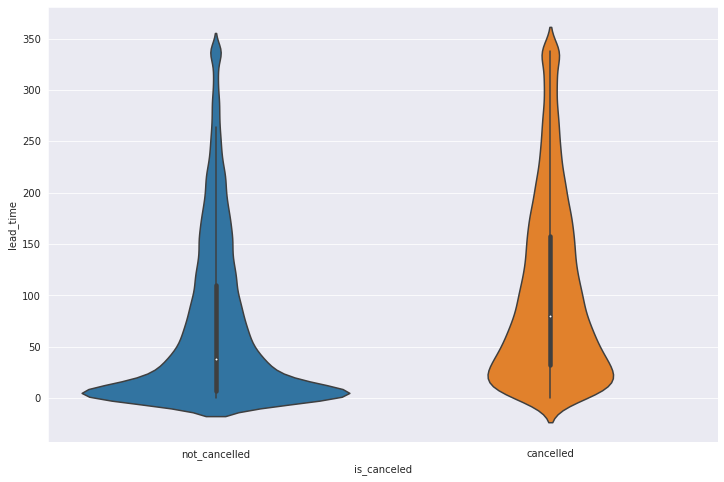

In [616]:
sns.violinplot(x ='is_canceled', y ='lead_time', data = df1, split = True) ###checking the relationship between is_cancelled and lead_time using violin plot
plt.show()

**2.What is/are the insight(s) found from the chart?**
- we are getting clear evidence here that bookings with high lead time have more chances of getting cancelled
- Not canceled bookings are having a less mean lead_time

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'total_people'],
      dtype='object')

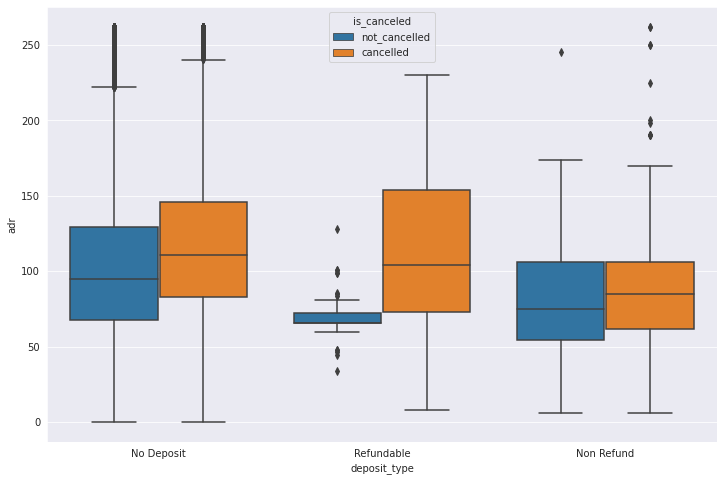

In [619]:
sns.boxplot(x ='deposit_type', y ='adr', data = df1, hue ='is_canceled') ###plotting a boxplot to understand relationship between adr and 
plt.show()  

In [618]:
df1['deposit_type'].value_counts()

No Deposit    86085
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [596]:
df1['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [597]:
df1['customer_type'].value_counts()

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

In [598]:
df1['distribution_channel'].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

#### Chart - 1 
Seaborn Heatmap - 
A heat map represents these coefficients to visualize the strength of correlation among variables 

Lets check the correlation using correlation matrix between all numerical features, because it will give us some idea about which independent features are useful and has the potential to affect the dependent feature

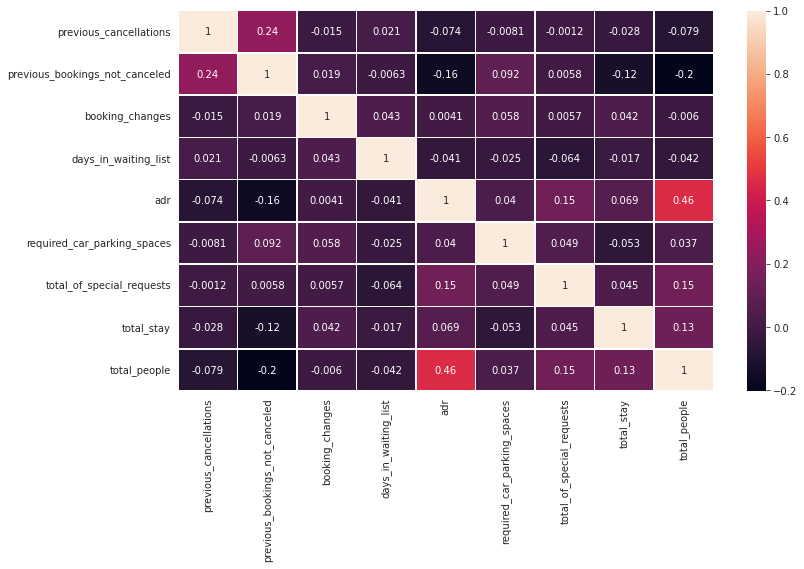

In [583]:
corr=df1[numerical_features].corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, annot=True, linewidth=.5)
plt.show()

In [584]:
corr[corr['total_stay'] > 0.05]['total_stay']
### Trying to check with which variables the correlation of total_stay is more than 0.05

adr             0.068776
total_stay      1.000000
total_people    0.131572
Name: total_stay, dtype: float64

In [585]:
corr[corr['adr'] > 0.05]['adr']
### Trying to check with which variables the correlation of adr is more than 0.05

adr                          1.000000
total_of_special_requests    0.148215
total_stay                   0.068776
total_people                 0.463953
Name: adr, dtype: float64

**2. What is/are the insight(s) found from the chart?**

Focusing on the lighter shades cells-
- Good correlation between lead time and total stay = 0.32, it means people who are planning for a vacation before hand are staying for long time.
- Good correlation between total people and adr = 0.38 . Since ADR = Room Revenue/Rooms Sold* ,therefore when no of people per room increases hotel charges more money per room. So revenue also increases.
- People who are making some positive booking changes are more trustable to turn up for a stay .
- Ofcourse total stay increases the average daily rate and revenue
- Good correlation between total_people and total_stay = 0.10, this shows that when people are coming in numbers of more than one they staying a little bit longer rather than staying alone.
- Special requests by the guests is also contributing to the adr and revenue.

Lets check for any variables which lead to negative growth

In [586]:
corr[corr['adr'] < 0 ]['adr'] 


previous_cancellations           -0.074432
previous_bookings_not_canceled   -0.156779
days_in_waiting_list             -0.041210
Name: adr, dtype: float64

In [587]:
corr[corr['total_stay'] < 0]['total_stay']


previous_cancellations           -0.027517
previous_bookings_not_canceled   -0.124979
days_in_waiting_list             -0.016946
required_car_parking_spaces      -0.053324
Name: total_stay, dtype: float64

**3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

Yes the gained insights will create a positive business impact.
Days_in_waiting_list shows negative correlation here but practically it is a mixed situation because guests will only be in waiting list only if rooms are full in the hotel which is very good for a hotel business. 

#### Chart - 2

##### 1. Why did you pick the specific chart?
Using **scatterplot** to explore the relationship between total_stay,adr and is_canceled because it is the best option for multivariate analysis of continous variables wrt categorical variable

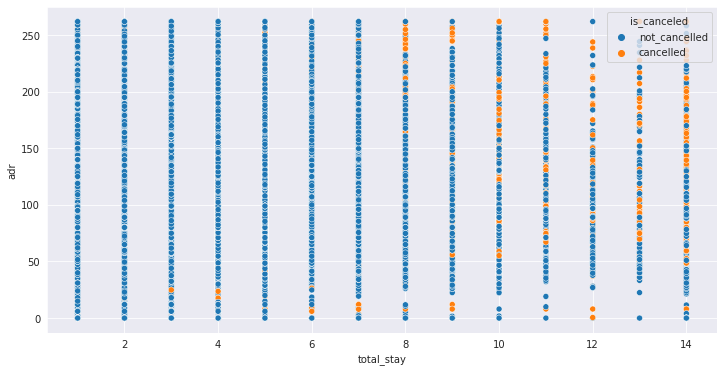

In [588]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1,hue='is_canceled')
plt.show()

We are gtting a point where adr is greater than 5000 which a potential outlier.So we need to delete the outlier to get a better view of the scatterplot in detail

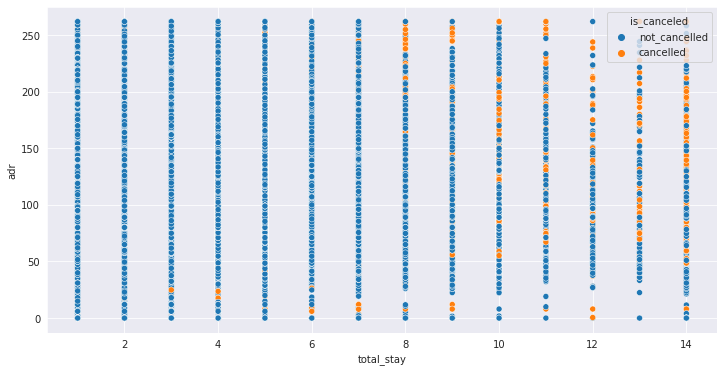

In [589]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)  ###dropiing the outlier
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1,hue='is_canceled')  ###lets see againwith scatterplot
plt.show()
##it looks better now with more depth of insights


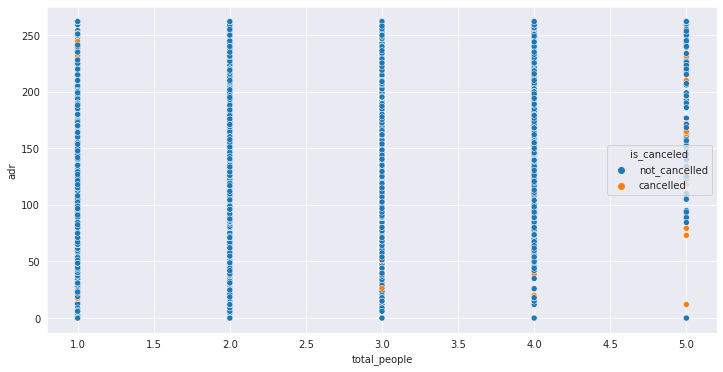

In [590]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_people', data = df1,hue='is_canceled')  ###lets see for total_people variable also
plt.show()

2. What is/are the insight(s) found from the chart?

From the scatter plot we can see that as length of total_stay and total_people increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.
Also higher no of people leads to cancellation of stay.



**3.Are there any insights that lead to negative growth? Justify with specific reason.**



Hotel should follow up with the bookings made for people more than 10 people and confirm their status in time so that the genuine bookings doesnt stay on the waiting list unnecessarily.